## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# focus on data we are interested in
drug_results = mouse_study_df.loc[:,["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
drug_results

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Ramicane,0,45.000000
1,Ramicane,5,38.825898
2,Ramicane,10,35.014271
3,Ramicane,15,34.223992
4,Ramicane,20,32.997729
...,...,...,...
1888,Naftisol,25,63.145652
1889,Naftisol,30,65.841013
1890,Naftisol,35,69.176246
1891,Naftisol,40,70.314904


## Summary statistics

In [6]:
# calculate mean, median, variance, standard deviation, and SEM of the tumor volume
tumor_mean = drug_results.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = drug_results.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_var = drug_results.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_sem = drug_results.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
tumor_std = drug_results.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = pd.DataFrame({"Average Tumor Volume (mm3)": tumor_mean,
                       "Median Tumor Volume (mm3)": tumor_median,
                       "Variance": tumor_var,
                       "Standard Deviation": tumor_std,
                       "Standard Error": tumor_sem})
# formatting
summary["Average Tumor Volume (mm3)"] = summary["Average Tumor Volume (mm3)"].map("{:.2f}".format)
summary["Median Tumor Volume (mm3)"] = summary["Median Tumor Volume (mm3)"].map("{:.2f}".format)
summary["Variance"] = summary["Variance"].map("{:.2f}".format)
summary["Standard Deviation"] = summary["Standard Deviation"].map("{:.2f}".format)
summary["Standard Error"] = summary["Standard Error"].map("{:.2f}".format)

# print dataframe
summary

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

In [7]:
# data_counts_pd = drug_results("Drug Regimen").value_counts()
# TypeError: 'DataFrame' object is not callable
data_counts = drug_results.groupby("Drug Regimen").count()["Timepoint"]

Text(0.5, 1.0, 'Data Points Count for Each Treatment Regimen')

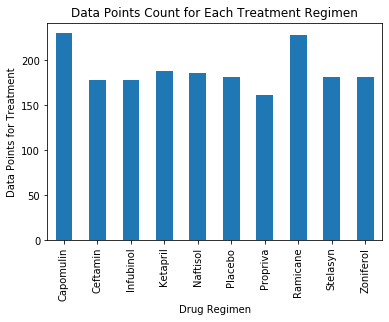

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# count data points
data_counts = drug_results.groupby("Drug Regimen").count()["Timepoint"]

# create bar plot using pandas
pandas_bar = data_counts.plot(kind="bar")
#data_counts.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Data Points for Treatment")
pandas_bar.set_title("Data Points Count for Each Treatment Regimen")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

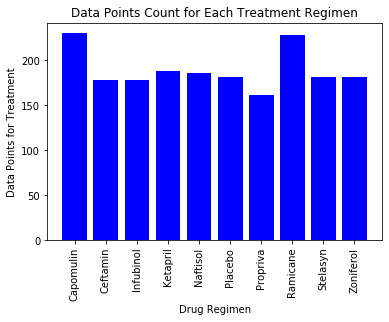

In [24]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# count data points
data_counts = pd.DataFrame(drug_results.groupby("Drug Regimen").count()["Timepoint"])
data_counts
#drugs = drug_results("Drug Regimen").count()
plt.bar(data_counts.index, data_counts["Timepoint"], color="b", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points for Treatment")
plt.title("Data Points Count for Each Treatment Regimen")
plt.xticks(rotation=90)

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen